# Higher Dimensions

In [1]:
# Scatter Matrix, Correlation Matrix, and Manifold Learning

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
from sklearn import manifold

df = pd.read_csv("heart.csv")
target = df[["age", "sex", "cp", "trestbps", "chol", "thalach"]]
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Scatter Matrix

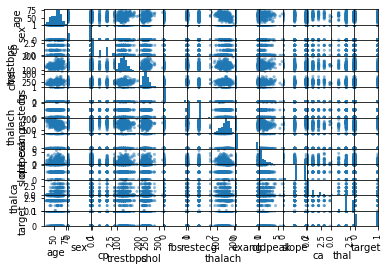

In [3]:
pd.plotting.scatter_matrix(df);

In [4]:
## Correlation Matrix

In [5]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


ax = sb.heatmap(df.corr(), annot=True);

## Manifold Learning

In [10]:
np.random.seed(0)
n = 2000
t = np.linspace(0, 20, n)

x = t * np.sin(t) + 0.2 * np.random.normal(size=n)
y = t * np.cos(t) + 0.2 * np.random.normal(size=n)

z = np.log(t + 1) * np.sin(np.sqrt(t))+ 0.1 * np.random.normal(size=n)
a = np.log(t + 1) * np.cos(np.sqrt(t))+ 0.1 * np.random.normal(size=n)

df2 = pd.DataFrame({"x": x, "y": y, "z": z, "a": a})
data = df2.to_numpy()

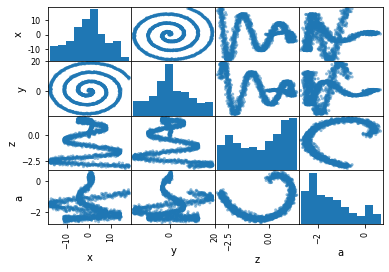

In [11]:
pd.plotting.scatter_matrix(df2);

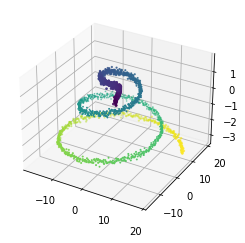

In [13]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(x, y, z, c=t, s=3+a)

Running LLE
Running LTSA
Running Hessian LLE
Running Modified LLE
Running Isomap
Running MDS
Running SE
Running t-SNE


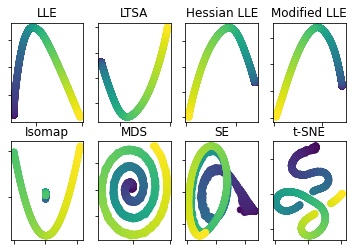

In [14]:
methods = [
    ("LLE", manifold.LocallyLinearEmbedding(n_neighbors=20, method='standard')),
    ("LTSA", manifold.LocallyLinearEmbedding(n_neighbors=20, method='ltsa')),
    ("Hessian LLE", manifold.LocallyLinearEmbedding(n_neighbors=20, method='hessian')),
    ("Modified LLE", manifold.LocallyLinearEmbedding(n_neighbors=20, method='modified')),
    ("Isomap", manifold.Isomap()),
    ("MDS", manifold.MDS(n_init=1)),
    ("SE", manifold.SpectralEmbedding()),
    ("t-SNE", manifold.TSNE()),
]

fig, axes = plt.subplots(nrows=2, ncols=4)
for (name, method), ax in zip(methods, axes.flatten()):
    print(f"Running {name}")
    Y = method.fit_transform(data)
    ax.scatter(Y[:, 0], Y[:, 1], c=t)
    ax.set_title(name)
    ax.set_xticklabels([])
    ax.set_yticklabels([])